# **Car Buyer Prediction using Social Network Ads**

This dataset contains information of users in a social network. Those informations are the user id, the gender, the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.

# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

# Data cleaning

In [3]:
df.shape

(400, 5)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
df['Gender'] = df.Gender.map({'Male':1,'Female':0})

Changing the datatype of Gender from string to int by doing label encoding.

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [8]:
df = df.drop('User ID', axis = 1)

User ID is unique for each record, so it is not important for data analysis.

In [9]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [10]:
df = df.drop_duplicates()
df.shape

(380, 4)

Dropped the duplicates in the dataset.

In [11]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

There is no null values in the dataset.

In [12]:
df['Purchased'].value_counts()

0    240
1    140
Name: Purchased, dtype: int64

In [13]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,380.000000,380.000000,380.000000,380.000000
mean,0.478947,37.586842,70421.052632,0.368421
std,0.500215,10.592492,34604.155483,0.483012
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.000000,43000.000000,0.000000
50%,0.000000,37.000000,70500.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [14]:
# Age
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
print('IQR :',iqr)
upper_threshold = df['Age'].quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :',upper_threshold)
lower_threshold = df['Age'].quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :',lower_threshold)

IQR : 17.0
Upper Threshold : 71.5
Lower Threshold : 3.5


In [15]:
# Estimated Salary
iqr = df['EstimatedSalary'].quantile(0.75) - df['EstimatedSalary'].quantile(0.25)
print('IQR :',iqr)
upper_threshold = df['EstimatedSalary'].quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :',upper_threshold)
lower_threshold = df['EstimatedSalary'].quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :',lower_threshold)

IQR : 45000.0
Upper Threshold : 155500.0
Lower Threshold : -24500.0


There are no outliers in the dataset also.

# EDA

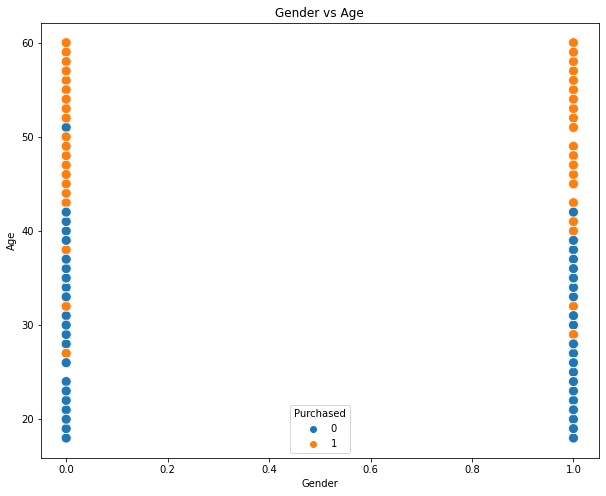

In [16]:
# Gender vs Age
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Gender', y = 'Age', hue = 'Purchased', data =df, s = 100)
plt.title('Gender vs Age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

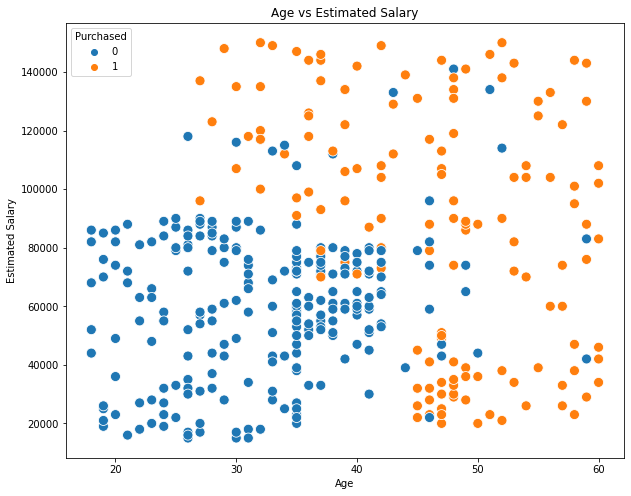

In [17]:
# Age vs Estimated Salary
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Age', y = 'EstimatedSalary', hue = 'Purchased', data =df, s=100)
plt.title('Age vs Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

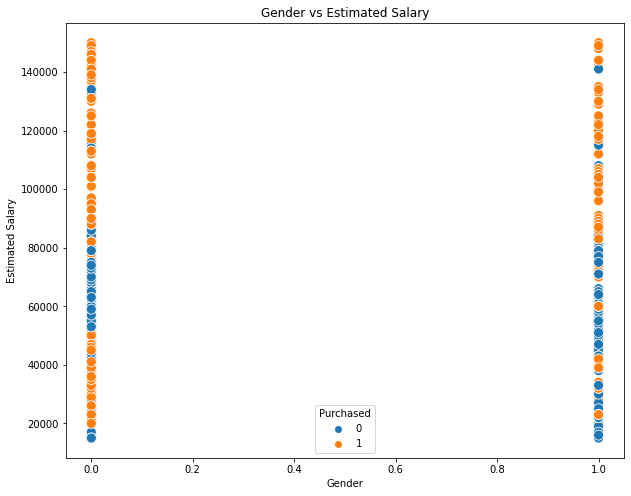

In [18]:
# Gender vs Estimated Salary
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Gender', y = 'EstimatedSalary', hue = 'Purchased', data =df, s = 100)
plt.title('Gender vs Estimated Salary')
plt.xlabel('Gender')
plt.ylabel('Estimated Salary')
plt.show()

Since the target variable is categorical and Decision Tree algorithm can learn both linear and non-linear patterns in data, we are proceeding with Decision Tree algorithm.

# Data preparation

In [19]:
X = df[['Gender','Age','EstimatedSalary']]
y = df['Purchased']

Taking all the features in X and the target in y.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Split the data into train and test.


*   Training - 70%
*   Testing - 30%



# Model training

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train) 

DecisionTreeClassifier()

# Prediction

In [22]:
y_pred = dt.predict(X_test)

In [23]:
compare = pd.DataFrame({'Original':y_test, 'Predicted':y_pred})
compare.head(10)

,Original,Predicted
343,1,1
247,1,1
26,1,1
98,0,0
219,1,1
41,0,0
377,0,0
172,0,1
298,0,1
117,0,0


# Evaluation metric

Accuracy : 0.8421052631578947
AUROC : 0.8402667513496348
ROC Curve: <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7ffb1a4ded30>


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


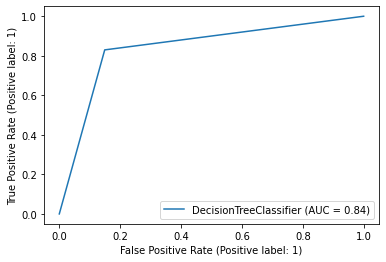

In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
print('Accuracy :', accuracy_score(y_test,y_pred))
print('AUROC :', roc_auc_score(y_test, y_pred))
print('ROC Curve:', plot_roc_curve(dt, X_test, y_test))

As this model gives 0.88 as AUROC score, we can conclude that it is a very good model to predict the buyer of the SUV with 88% accuracy.

# Reduce overfitting

As the decision tree tends to overfit, we are using the max_depth hyperparameter to control the overfitting by doing hyperparameter-tuning using hit & trial and cross validation.

In [25]:
from sklearn.model_selection import cross_val_score 
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) 
  dt.fit(X_train, y_train)
  dt = DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) 
  print("Depth :", depth, " Cross val score :" , np.mean(valAccuracy))

Depth : 1  Cross val score : 0.8235042735042736
Depth : 2  Cross val score : 0.8947293447293447
Depth : 3  Cross val score : 0.8797720797720798
Depth : 4  Cross val score : 0.861111111111111
Depth : 5  Cross val score : 0.8649572649572651
Depth : 6  Cross val score : 0.8571225071225073
Depth : 7  Cross val score : 0.8611111111111113
Depth : 8  Cross val score : 0.8458689458689459
Depth : 9  Cross val score : 0.8423076923076923
Depth : 10  Cross val score : 0.8497150997150997
Depth : 20  Cross val score : 0.8495726495726496


As we can see from the above scores, the model with depth 3 gives the highest cross validation score of 89%

# Feature importance

In [26]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train) 
importance = dt.feature_importances_
list(zip(importance,X_test.columns))

[(0.0, 'Gender'),
 (0.629506111529454, 'Age'),
 (0.37049388847054593, 'EstimatedSalary')]

Here, we have fitted the model with max depth as 3 and have found the importance of each feature. Here, Age and Estimated Salary are the most important features in buying a SUV.

# Visualisation of tree

[Text(0.5, 0.875, 'X[1] <= 41.5\ngini = 0.455\nsamples = 266\nvalue = [173, 93]'),
 Text(0.25, 0.625, 'X[2] <= 91500.0\ngini = 0.237\nsamples = 182\nvalue = [157, 25]'),
 Text(0.125, 0.375, 'X[1] <= 36.5\ngini = 0.038\nsamples = 154\nvalue = [151, 3]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 111\nvalue = [111, 0]'),
 Text(0.1875, 0.125, 'gini = 0.13\nsamples = 43\nvalue = [40, 3]'),
 Text(0.375, 0.375, 'X[2] <= 117500.0\ngini = 0.337\nsamples = 28\nvalue = [6, 22]'),
 Text(0.3125, 0.125, 'gini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.75, 0.625, 'X[1] <= 46.5\ngini = 0.308\nsamples = 84\nvalue = [16, 68]'),
 Text(0.625, 0.375, 'X[2] <= 35500.0\ngini = 0.466\nsamples = 27\nvalue = [10, 17]'),
 Text(0.5625, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.6875, 0.125, 'gini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.875, 0.375, 'X[2] <= 41000.0\ngini = 0.188\nsamples = 57\nvalue = [6, 51]'),

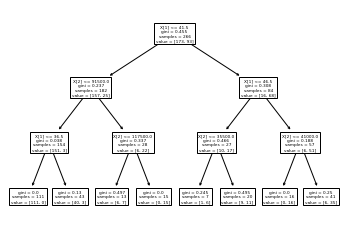

In [27]:
from sklearn import tree
tree.plot_tree(dt)

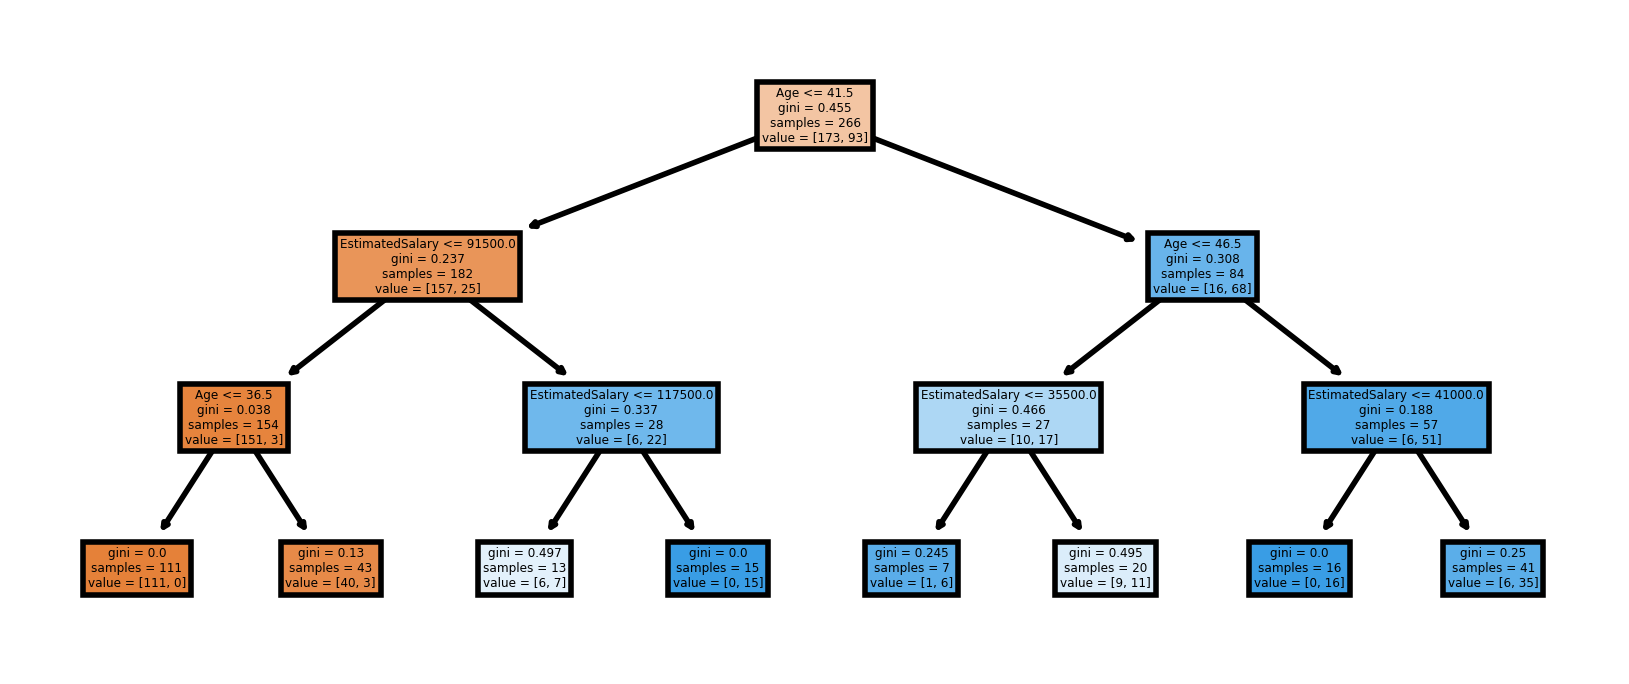

In [29]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,2), dpi=400)
tree.plot_tree(dt, feature_names = X_test.columns, filled = True);
fig.savefig('dt.png')

This is how the decision tree is constructed for the given dataset.